# Trabalho 6 - Transformada de Fourier e realce no domínio da frequência

Faça as seguintes simulações no jupyther notebook e aproveite os recursos disponíveis para explicar os fundamentos e resultados obtidos

### (1) Série de Fourier de função unidimensional

A função triangular, representada pelo gráfico a seguir, é uma função periódica. Esta classe de funções pode ser representa através de uma série de Fourier.

![](../images/GraficoFuncaoTriangular.png)

A série de Fourier que representa esta função é dada pela seguinte equação:

![](../images/triangularFuncao.png)

Varie o número de senóides para apresentar graficamente diferentes aproximações da função triangular.

[Referência](http://www.matematica.pucminas.br/profs/web_fabiano/calculo4/sf.pdf)

### (2) Prova empírica da propriedade translação e mudança de fase

* (2.1) - Crie duas imagens binárias contendo um mesmo objeto geométrico. A diferença entre as imagens é a translação em que o objeto aparece.
* (2.2) - Calcule a o módulo da transformada de Fourier de cada uma das imagens
* (2.3) - Faça a subtração entre estas imagens e a utilize para demostrar a propriedade  
    
    Referência: Gonzalez e Woods Processamento digital de Imagens

### (3) Filtragem de Fourier pegue uma fotografia de sua autoria.

Execute a filtragem passa-baixa de Fourier desta imagem usando os filtros Butterworth e Ideal.

Compare os resultados obtidos em termos dos fundamentos teóricos correspondentes. 

Referência: Gonzalez e Woods Processamento digital de Imagens

### (4) Filtros espaciais aproximados

Utilizando a imagem e o filtro de Butterworth empregados no exercício anterior, obtenha filtros aproximados no domínio espacial de dimensões nxn . Para este valor de n calcule o somatório do erro quadrático da diferença entre os resultados obtidos pelo filtro exato e o aproximado. Repita este procedimento para diferentes valores de n e trace o gráfico n x SSE. Analise e explique os resultados obtidos. 

-------

### Bibliotecas

In [1]:
import numpy as np
import cv2 as cv

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

-------

## (1) Série de Fourier

Uma função periódica pode ser escrita por uma série de Fourier. A seguir mostraremos o resultado de uma série de Fourier, ao variar o número de senóides de sua expansão.

Partiremos da seguinte equação:

$$
\begin{equation}
    f(x) \sim \frac{1}{2} - \frac{4}{\pi^{2}}\sum^{\infty}_{k = 0}\frac{1}{(2k - 1)^{2}}\sin[(2k - 1)\pi x],
\end{equation}
$$

em que variar o número de senóides significa aumentar os termos do somatório.



In [110]:
x_ = np.linspace(-5, 5, num = 1001)

In [122]:
def fourier_series(x, k):
    partial_sum = 0.5
    for i in range(k):
        partial_sum = partial_sum - bk(k) * np.sin(wk(k)*x)
        
    return partial_sum

In [123]:
def bk(k):
    return 1 / (2*k - 1)**2   

In [124]:
def wk(k):
    return (2*k - 1) * np.pi

In [135]:
f1 = []
T = 8
armonics = 100

In [136]:
for x in x_:
#     f.append(fourierSeries222(armonics,i))
    f1.append(fourier_series(x, armonics))

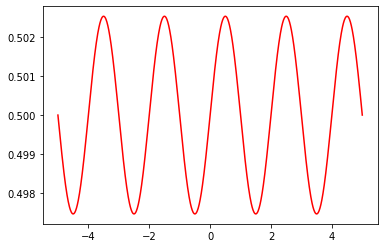

In [137]:
plt.plot(x_, f1, color = "red")

In [213]:
n_max = 100
Fn = np.zeros((n_max + 1, x_.size))

In [214]:
def wn(n):
    return (2*n - 1) * np.pi

In [215]:
def bn(n):
    return (1 / (2*n  - 1)**2)

In [216]:
def fourier_series(x, n):
    f = 0.5
    if n == 0:
        f = f - bn(n) * np.sin(wn(n) * x)
    else:
        for i in range(1, n):
            f = f - bn(n) * np.sin(wn(n) * x)
    
    return f

In [217]:
for n in range(n_max + 1):
    for x in range(x_.size):
        Fn[n, x] = fourier_series(x_[x], n)              

In [2]:
def plota(img):
    num = len(img)
    fig = plt.figure(figsize = (15, 9))
    grid = plt.GridSpec(1, num, fig)
    
    for i in range(num):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(img[i], cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
    return fig

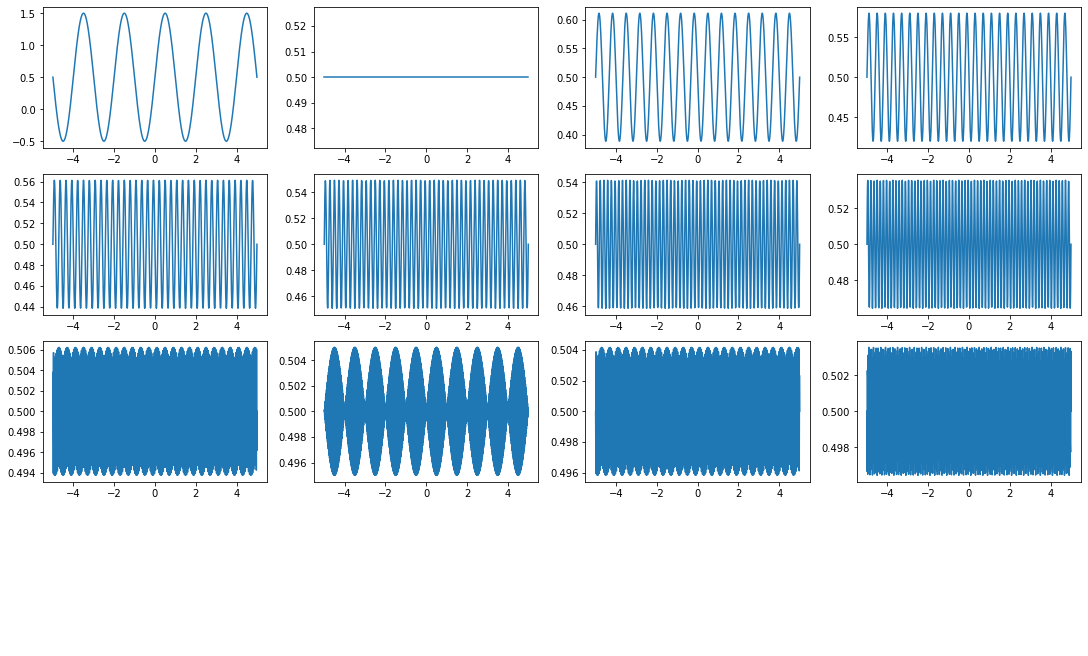

In [250]:
fig = plt.figure(figsize = (15, 9), constrained_layout = True)

grid = plt.GridSpec(4, 4, fig)

ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])#, sharey = ax0)
ax2 = fig.add_subplot(grid[0, 2])#, sharey = ax0)
ax3 = fig.add_subplot(grid[0, 3])#, sharey = ax0)

ax0.plot(x_, Fn[0])
ax1.plot(x_, Fn[1])
ax2.plot(x_, Fn[2])
ax3.plot(x_, Fn[3])

ax4 = fig.add_subplot(grid[1, 0])#, sharey = ax0)
ax5 = fig.add_subplot(grid[1, 1])#, sharey = ax0)
ax6 = fig.add_subplot(grid[1, 2])#, sharey = ax0)
ax7 = fig.add_subplot(grid[1, 3])#, sharey = ax0)

ax4.plot(x_, Fn[4])
ax5.plot(x_, Fn[5])
ax6.plot(x_, Fn[6])
ax7.plot(x_, Fn[7])

ax8 = fig.add_subplot(grid[2, 0])#, sharey = ax0)
ax9 = fig.add_subplot(grid[2, 1])#, sharey = ax0)
ax10 = fig.add_subplot(grid[2, 2])#, sharey = ax0)
ax11 = fig.add_subplot(grid[2, 3])#, sharey = ax0)

ax8.plot(x_, Fn[40])
ax9.plot(x_, Fn[50])
ax10.plot(x_, Fn[60])
ax11.plot(x_, Fn[70])